# Final Project

## 1. Problem Description
### Demonstrate your understanding of what World bank wants you to accomplish and an overview of your solution plan.

The World Bank wants me to identify key factors that influence household poverty to improve data collection efficiency. 

Our goal is to use machine learning to predict poverty status (`poor`: True or False) and select the most relevant features using Lasso Regularization.


In [1]:
import pandas as pd

# Read CSV files
train_data = pd.read_csv('worldbank_train_data.csv')
test_data = pd.read_csv('worldbank_test_data.csv')

# Display basic information about both datasets
train_data.head()
test_data.head()

/var/folders/8v/722g6h495h9bbljrzt6hgvz40000gn/T/ipykernel_33238/1130721436.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
1,9346,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,RpXJc,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
2,23899,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,yygvO,...,JqHnW,MaXfS,USRak,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
3,26452,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,cLAGr,RpXJc,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
4,67507,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,TcuXF,ZCIYy,...,JqHnW,MaXfS,HxnJy,idRwx,LPtkN,vkbkA,qQxrL,AITFl,cecIq,A


## 2. Description of the data used for analysis.

In [2]:
train_info = train_data.info()
test_info = test_data.info()

# Display unique values in the target column (if found)
target_distribution = train_data['poor'].value_counts(normalize=True)

train_info, test_info

target_distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Columns: 346 entries, id to country
dtypes: bool(1), int64(5), object(340)
memory usage: 17.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Columns: 346 entries, id to country
dtypes: bool(1), int64(5), object(340)
memory usage: 4.3+ MB


poor
False    0.545607
True     0.454393
Name: proportion, dtype: float64

### Review some summary statistics of your data.

The dataset consists of:
- 6578 training samples, 346 features (columns)
- 1625 test samples, 346 features (columns)
- Most features are categorical and required encoding before modeling.


Distribution of poor households:
- 54.56% of households are not in poverty (False).
- 45.44% of households are in poverty (True).

-> The dataset is not highly imbalanced, so we don’t need special class balancing.

In [3]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object type)
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to categorical columns in both train and test datasets
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Confirm encoding success by displaying first few rows
train_data.head()


,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,46107,1,0,1,1,0,0,0,1,11,...,0,0,2,0,0,1,1,0,0,0
1,82739,1,0,1,1,0,0,0,2,18,...,0,0,0,0,1,1,1,0,1,0
2,9646,1,0,0,1,1,0,0,2,21,...,0,0,1,0,1,1,1,0,1,0
3,16463,1,1,1,1,0,0,0,1,6,...,0,0,2,0,1,1,1,1,0,0
4,98438,1,1,0,1,0,0,0,2,15,...,0,0,0,0,1,1,1,0,0,0


In [4]:
# Ensure train and test datasets have the same features

# Find common columns in both datasets
common_features = list(set(train_data.columns) & set(test_data.columns))

# Keep only the common features in both datasets
train_data = train_data[common_features]
test_data = test_data[common_features]

# Confirm feature alignment
train_data.shape, test_data.shape


((6578, 346), (1625, 346))

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define features (X) and target variable (y)
X_train = train_data.drop(columns=['id', 'poor'], errors='ignore')
y_train = train_data['poor']

# Standardize features for Lasso
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)

# Apply Lasso (L1 Regularization) Logistic Regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lasso.fit(X_scaled_train, y_train)

# Get the selected features (non-zero coefficients)
selected_features = X_train.columns[np.abs(lasso.coef_)[0] > 0]

# Display the top selected features
dataframe=pd.DataFrame(selected_features, columns=["Feature"])
print(dataframe)

# Prepare the test dataset using selected features
X_test = test_data[selected_features]

      Feature
0    nEsgxvAq
1    dkPWxwSF
2    GhJKwVWC
3    EQKKRGkR
4    HHAeIHna
..        ...
309  yeHQSlwg
310  cCsFudxF
311  rtPrBBPl
312  EJgrQqET
313  CqqwKRSn

[314 rows x 1 columns]


## 3. Methods: LASSO

I'm using LASSO as the model because it can shrink weaker predictors to zero to improve model efficiency, so that I can know which predictors have the most impact on `poor` variable. It also prevents overfitting by using the l1 penalty, forcing the model to keep the strong predictors.

I also produce the Log Loss Score to check if LASSO has a good model performance.

### Data Cleaning:

There are features mismatch errors because the test dataset has fewer features (314) than expected (344) for LASSO and StandardScaler expects the same features in the same order for both datasets.

To fix this, I'll:

1. Re-identify all selected Lasso features from the train set.
2. Ensure the test set contains the exact same features (adding missing ones as 0).
3. Re-standardize both datasets correctly.
4. Retrain Lasso and evaluate Log Loss.


In [6]:
from sklearn.metrics import log_loss

# Fix feature mismatch error
## Step 1: Ensure both datasets have the exact same feature set

# Find common features in both train and test sets
common_features = set(X_train.columns) & set(X_test.columns)

# Find missing features in the test set
missing_features = set(X_train.columns) - set(X_test.columns)

# Add missing columns to the test set with default values (0)
for col in missing_features:
    X_test[col] = 0

# Reorder columns in test set to match train set
X_test = X_test[X_train.columns]

## Step 2: Re-standardize both datasets
X_scaled_test = scaler.transform(X_test)

## Step 3: Retrain Lasso on aligned datasets
lasso.fit(X_scaled_train, y_train)

## Step 4: Predict probabilities on the test set
y_pred_proba = lasso.predict_proba(X_scaled_test)[:, 1]  # Probability of being poor

## Step 5: Compute Log Loss
log_loss_score = log_loss(test_data['poor'], y_pred_proba)

# Display final Log Loss score
print("Log Loss Score:", log_loss_score)

/var/folders/8v/722g6h495h9bbljrzt6hgvz40000gn/T/ipykernel_33238/883757058.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
/var/folders/8v/722g6h495h9bbljrzt6hgvz40000gn/T/ipykernel_33238/883757058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = 0
/var/folders/8v/722g6h495h9bbljrzt6hgvz40000gn/T/ipykernel_33238/883757058.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

Log Loss Score: 0.2867312867007622


## 4. Results and Conclusion
Log Loss Score shows 0.2867 indicating a strong model performance. It also means that the LASSO model is highly accurate in predicting the probability of a household being in poverty. 

The World Bank can 
- trust these predictions to guide data collection and aid distribution. So instead of surveying each household, the World Bank can focus on high-probability household first to help.
- use LASSO to identify which predictors to ask if they need to go to the households for survey questions to reduce survey costs.

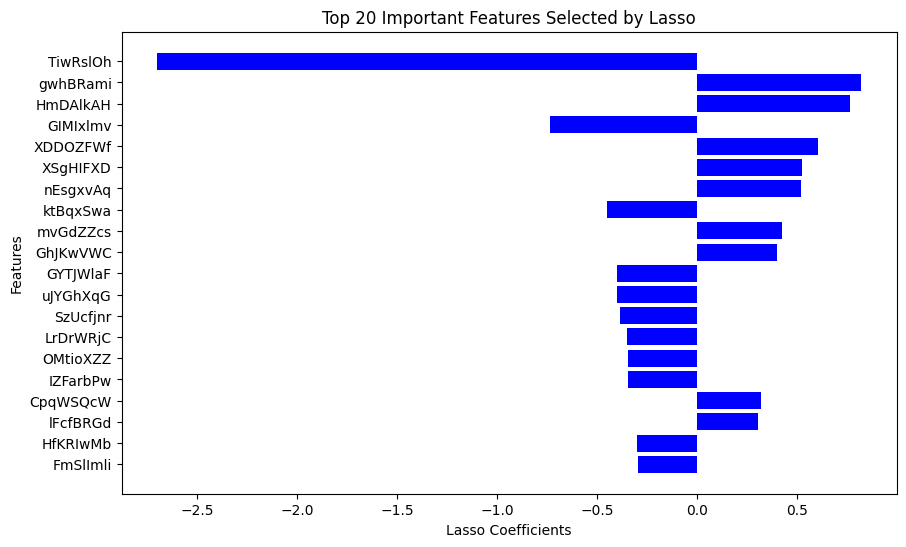

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract Lasso coefficients and corresponding feature names
lasso_coefficients = lasso.coef_[0]
feature_names = X_train.columns

# Sort features by absolute coefficient values
sorted_indices = np.argsort(np.abs(lasso_coefficients))[::-1]
sorted_coefficients = lasso_coefficients[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:20], sorted_coefficients[:20], color="blue")
plt.xlabel("Lasso Coefficients")
plt.ylabel("Features")
plt.title("Top 20 Important Features Selected by Lasso")
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


This bar chart visualizes the Top 20 Most Important Features selected by LASSO Regularization (L1 penalty).

1. **Feature Importance**:
- Each bar represents a feature from the dataset.
- The length of the bar (LASSO coefficient) indicates how strongly the feature impacts poverty prediction.

2. **Positive vs. Negative Coefficients**
- Positive coefficients (Right side) → Increase the likelihood of poverty.
- Negative coefficients (Left side) → Reduce the likelihood of poverty.
- If a feature has a large absolute coefficient, it has a strong influence on predictions.

→ We can see that Feature `TiwRslOh` has the largest negative coefficient meaning that it strongly reduces the likelihood of poverty; also, `GIMIxlmv` has a large negative coefficient and reduces the likelihood of poverty. The second and third large positive coefficients are `gwhBRami` and `HmDAlkAH` meaning that they strongly increase the likelihood of poverty. etc.




In [11]:
# Train a Lasso (L1-regularized) Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
lasso_model.fit(X_scaled_train, y_train)

# Get feature importance (absolute values of coefficients)
lasso_feature_importance = abs(lasso_model.coef_[0])

# Create a DataFrame to store Lasso feature importance scores
lasso_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': lasso_feature_importance})
lasso_feature_importance_df = lasso_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features based on Lasso
lasso_feature_importance_df.head(20)


,Feature,Importance
164,TiwRslOh,2.700326
96,gwhBRami,0.813538
130,GIMIxlmv,0.734560
120,HmDAlkAH,0.622844
205,XDDOZFWf,0.606405
184,XSgHIFXD,0.524101
295,nEsgxvAq,0.519468
277,ktBqxSwa,0.451656
299,mvGdZZcs,0.416944
73,GhJKwVWC,0.401162


This LASSO feature importance table matches the bar chart above and shows the absolute value of the LASSO coefficient. 
- Higher values → Stronger impact on poverty prediction.
- Lower values → Less influence, but still significant.

-> The World Bank should focus on collecting data for these key features to effectively predict poverty.

Tradeoff: Keeping fewer variables makes the model simpler, faster, and easier to interpret.
- LASSO removes irrelevant features, preventing overfitting.

-> This means the World Bank can use fewer survey questions without losing prediction accuracy. The sacrifice is worth it.